<a href="https://colab.research.google.com/github/MahmoodInamdar/Python-projects-MI/blob/main/Employees_prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

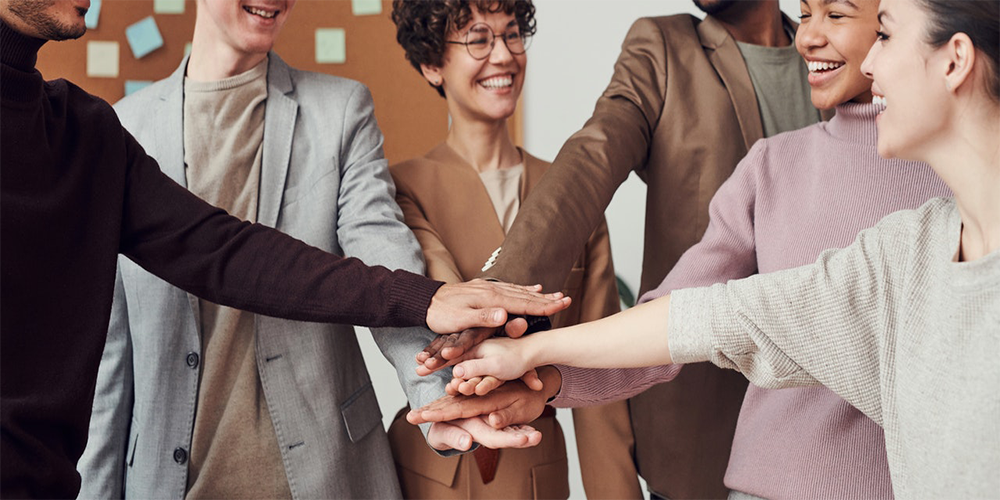

In [3]:
import IPython.display

image_address = "https://www.betterup.com/hubfs/Imported_Blog_Media/employee%20relations%20blog%20image-1.png"    # or for example "image.jpg"
IPython.display.Image(image_address)

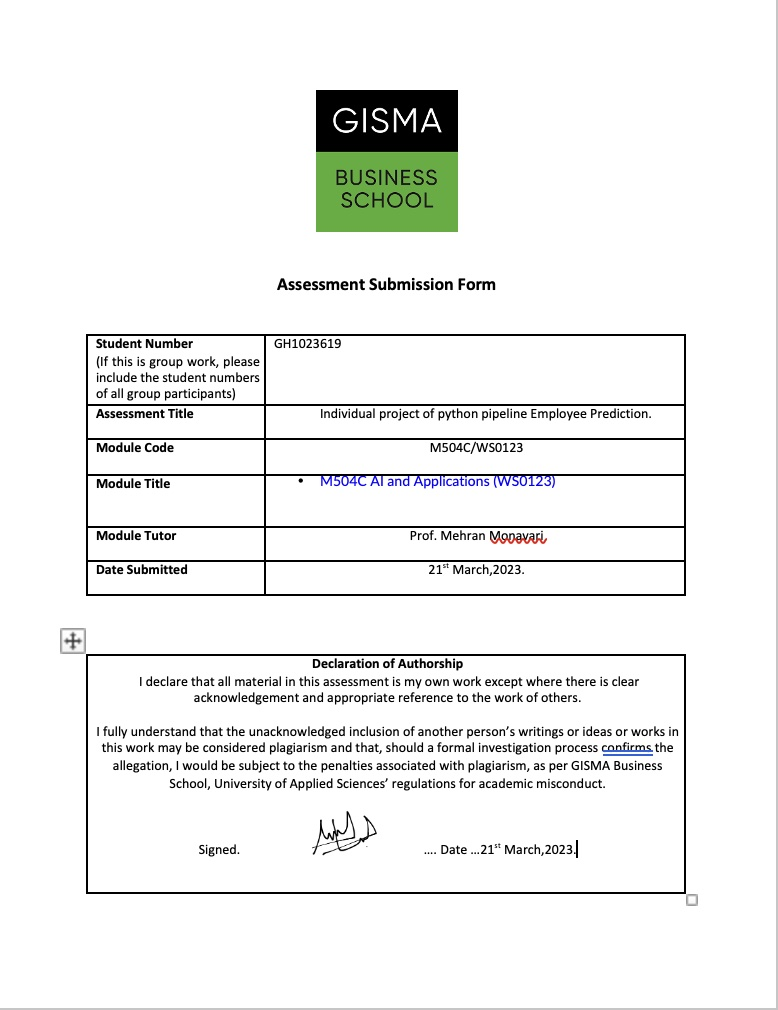



**Mahmood Inamdar: GH1023619**

This will be my final Assessment which will be submitted on canvas.

The Data which is used by me is Employee Prediction based on few features labels.


Below I have imported all the libraries together:


tejashvi14 (2022) Employee Future Prediction, Available at: https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction/code (Accessed: 20.03.2023).

In [4]:
import pandas as pd
import matplotlib.pyplot as graph
import seaborn as chart
from matplotlib import cm
import numpy as np

In the below step, the data has been imported using pandas library. 

In [5]:
df = pd.read_csv("Employee.csv")

df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


**Data Cleaning:**

To check if we have any implicit value or explicit value to clean the data. As of now, the data does not need any cleanup as we checked all the unique values.

In [6]:
for i in df.columns:
  print(i)
  print(df[i].unique(),"\n")

Education
['Bachelors' 'Masters' 'PHD'] 

JoiningYear
[2017 2013 2014 2016 2015 2012 2018] 

City
['Bangalore' 'Pune' 'New Delhi'] 

PaymentTier
[3 1 2] 

Age
[34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41] 

Gender
['Male' 'Female'] 

EverBenched
['No' 'Yes'] 

ExperienceInCurrentDomain
[0 3 2 5 1 4 7 6] 

LeaveOrNot
[0 1] 



The same process to check any null value using graph

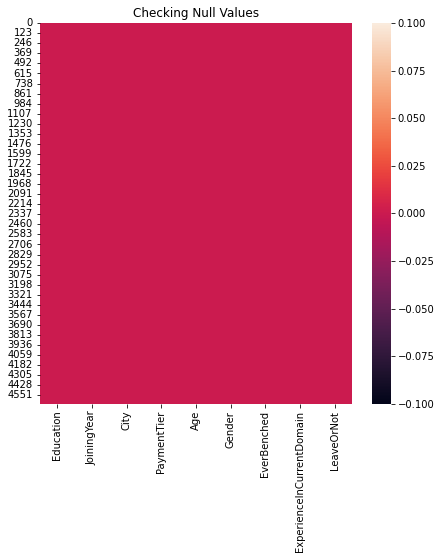

In [7]:
graph.figure(figsize = (7,7))
chart.heatmap(df.isnull())
graph.title('Checking Null Values')
graph.show()

**Question 1.**

How many employess from the company are going to leave?

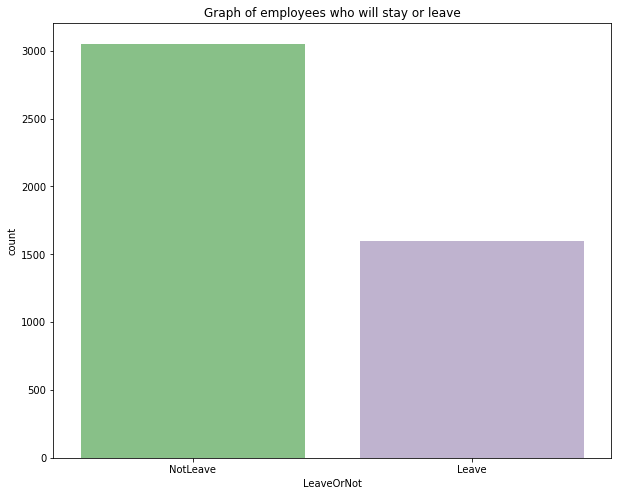

In [10]:
graph.figure(figsize = (10,8))
graph.title('Graph of employees who will stay or leave')
df['LeaveOrNot'] = df['LeaveOrNot'].map({1:'Leave' ,0:'NotLeave' })
chart.countplot(x = df['LeaveOrNot'] , palette='Accent')
graph.show()

**Summary:**

By understanding the above graph, It can be said that almost 1/3rd of the companies employess are going to leave.  


**Question 2.**

Employees with what experience are located in which office?

In [11]:
df["JoiningYear"].unique()


array([2017, 2013, 2014, 2016, 2015, 2012, 2018])

In [12]:
Experience=[]

for x in df["JoiningYear"]:
    if x>=2017:
        Experience.append("Newbie")
    elif x>=2015:
        Experience.append("mid level")
    else:
        Experience.append("high level")

In [13]:
employee_id=[]
for x in df['City']:
    if x=='Bangalore':
        employee_id.append('Ban')
    elif x=='Pune':
        employee_id.append('Pun')
    else:
        employee_id.append('Del')

In [14]:
df.insert(2,"employee_id",employee_id)
df.insert(6,"Experience",Experience)

a1=df["employee_id"]+'-'+df["Experience"]

df.insert(5,"EMP",a1)

Creating to different coloumns and merging them to make a 3rd coloumn for data visualisation. 

In [15]:
df.head(2)

,Education,JoiningYear,employee_id,City,PaymentTier,EMP,Age,Experience,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Ban,Bangalore,3,Ban-Newbie,34,Newbie,Male,No,0,NotLeave
1,Bachelors,2013,Pun,Pune,1,Pun-high level,28,high level,Female,No,3,Leave


<Axes: xlabel='Experience', ylabel='count'>

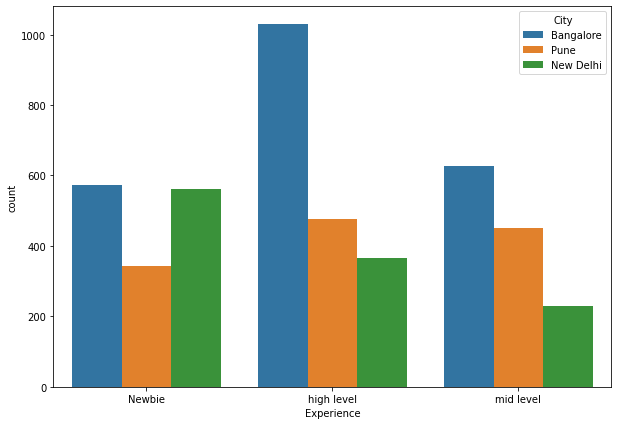

In [16]:
graph.figure(figsize=(10,7))
chart.countplot(data=df,x="Experience",hue="City")

**Summary:**

The above data helps us to understand that Banglore office has the most number of employees who are working and maximum of them are of high level experience in the company that is they are here before than 2015.

**Question 3:**

Employees from which city and of which level are going to leave?

<Axes: xlabel='EMP', ylabel='count'>

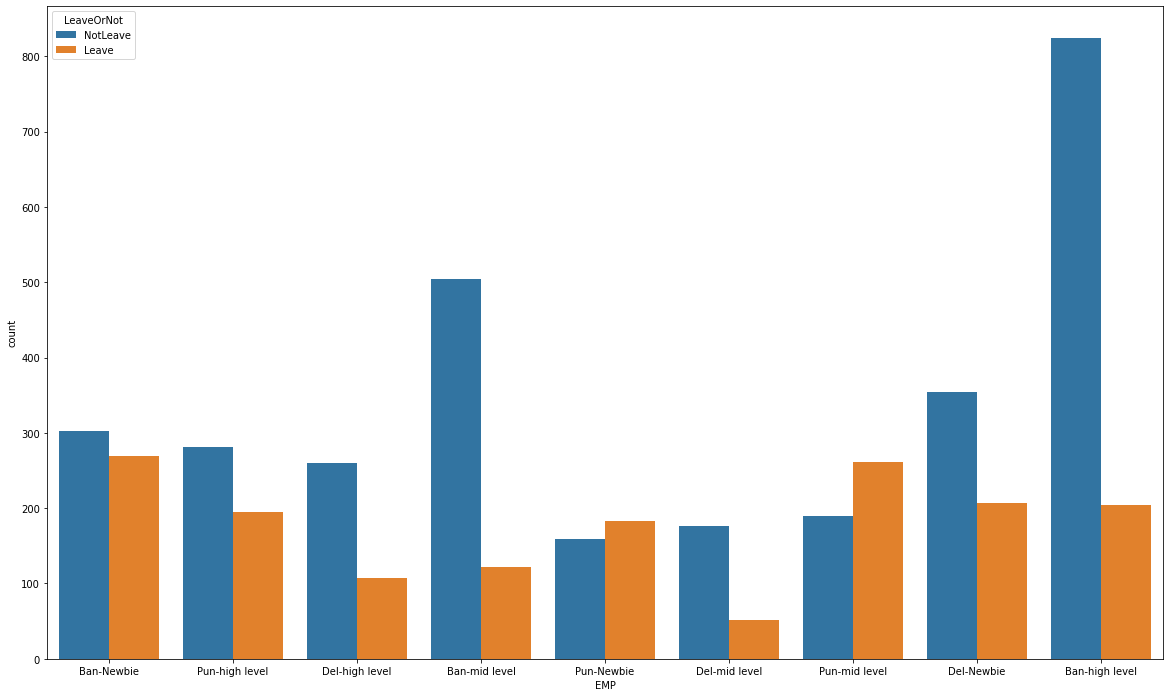

In [17]:
graph.figure(figsize=(20,12))
chart.countplot(data=df,x="EMP",hue="LeaveOrNot")

**Summary:**

In banglore, almost half of the newbies are planing to leave the company who have joined on or after 2017. Also, it is seen that people with high level of experience in banglore are going to continue. 

In Pune, More new joiners and the mid level are planing to take an exit. The company should solve this problem to make them continue or avoid this for  future.

In Delhi, The numbers are better but the employee strenght is not that of banglore.

**Question 4:**

Employees joined in which year are planning to leave the most?




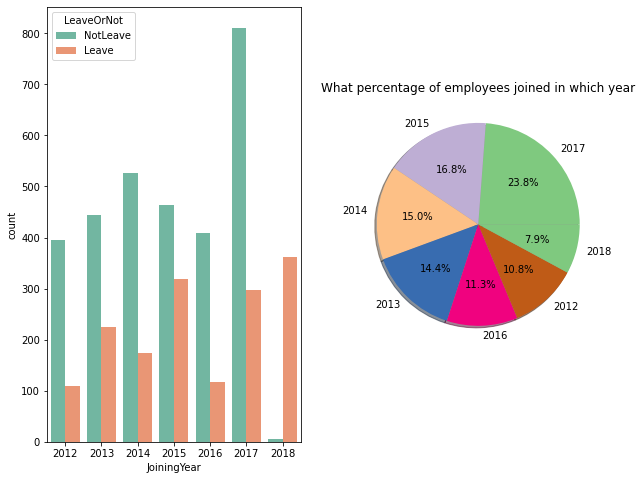

In [34]:
graph.figure(figsize = (10,8))
graph.subplot(1,2,2)
labels = df['JoiningYear'].value_counts().keys()
colors =cm.Accent(np.arange(6)/6)
graph.pie(x = df['JoiningYear'].value_counts() , labels = labels,
       colors = colors,
       autopct='%1.1f%%',shadow=True)
graph.title('What percentage of employees joined in which year')

graph.subplot(1,2,1)
chart.countplot(x = df['JoiningYear'], hue = df['LeaveOrNot'] , palette='Set2')
graph.show()


**Summary:**

In the pie chart, it can be seen that most of the employees were hired in 2017 followed by 2015. The hiring number declined in 2018. 


It is also clearly visible that employees who joined in 2018 will not continue. Either it was a wrong hiring strategy which was used in 2018 or else the employees are not satisfied with the companys service. 

The numbers are very better in 2017 where the HR team did a phenomenal job in hiring employees. 

**Question 5:**

Employees with what payment tiers are leaving the company?

<Axes: xlabel='PaymentTier', ylabel='count'>

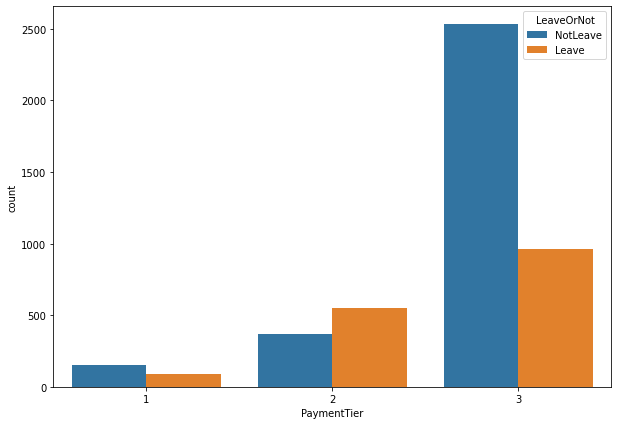

In [19]:
graph.figure(figsize=(10,7))
chart.countplot(data=df,x="PaymentTier",hue="LeaveOrNot")

**Summary:**

In the above graph, it is observed that people from the payment tier 2 will not continue where as most of the people from payment tier 3 will continue. 

**Question 6:**

Employees with what age are hired the most?

<ipython-input-20-05197fe44587>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  chart.distplot(df['Age'],color='blue',bins=15)


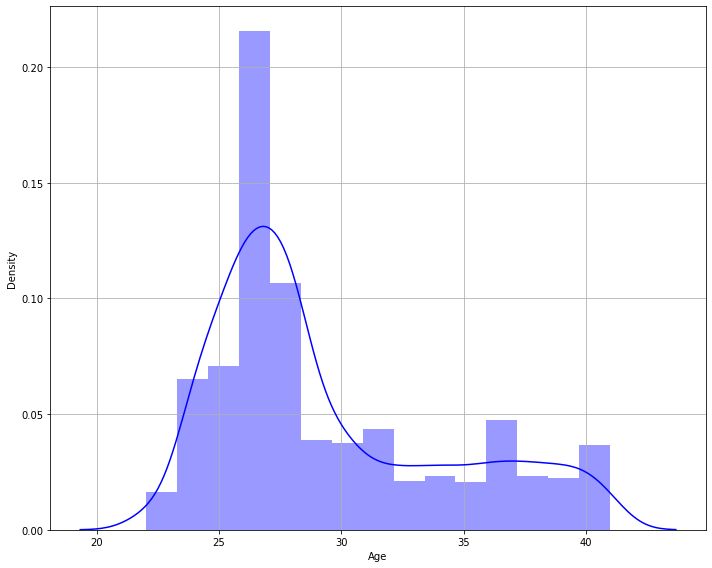

In [20]:
graph.figure(figsize=(10,8))
chart.distplot(df['Age'],color='blue',bins=15)
graph.tight_layout()
graph.grid(True)
graph.show()

**Summary:**

Emoployees aged between 25 to 30 are hired the most. wherein people above 40 has almost no hiring in the company. 

**Question 7:**

Employees with age what bracket will leave the company?

<Axes: xlabel='Age', ylabel='Count'>

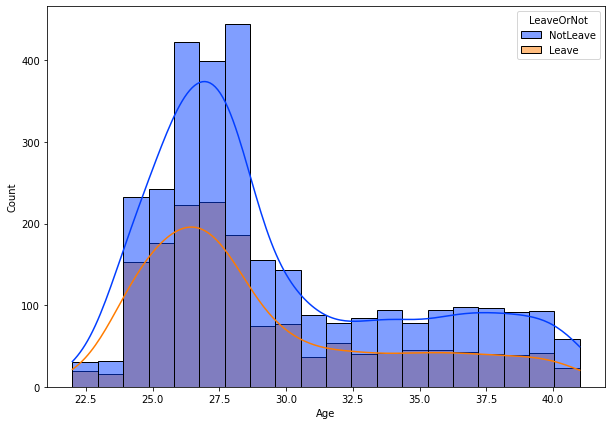

In [21]:
graph.figure(figsize=(10,7))
chart.histplot(data=df,x="Age",hue="LeaveOrNot",kde=True,bins=20,palette='bright')

**Summary:**

Most of the employees aged between 25 and 27 will leave the company. The hiring team work on this and let the young generation continue the company for the growth of the company. 

**Question 8:**

List of Females and Males from banglore and Pune ever benched?


In [22]:
b1=df.loc[(df["Gender"]=="Female") & ((df["City"]=="Bangalore") | (df["City"]=="Pune")) & (df["EverBenched"]=="No")]

In [23]:
b1.head(2)

,Education,JoiningYear,employee_id,City,PaymentTier,EMP,Age,Experience,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Bachelors,2013,Pun,Pune,1,Pun-high level,28,high level,Female,No,3,Leave
7,Bachelors,2016,Ban,Bangalore,3,Ban-mid level,34,mid level,Female,No,2,Leave


In [24]:
b2=df.loc[(df["Gender"]=="Male") & ((df["City"]=="Bangalore") | (df["City"]=="Pune")) & (df["EverBenched"]=="No")]

In [25]:
b2.head(2)

,Education,JoiningYear,employee_id,City,PaymentTier,EMP,Age,Experience,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Ban,Bangalore,3,Ban-Newbie,34,Newbie,Male,No,0,NotLeave
3,Masters,2016,Ban,Bangalore,3,Ban-mid level,27,mid level,Male,No,5,Leave


**Question 9:**

Mid level and Newbie employees combined in all location.


In [26]:
b4=df.loc[((df["City"]=="Bangalore") & (df["City"]=="Pune")) & ((df["City"]=="Delhi")) | (df["Experience"]=="mid level")]
b4.head(2)

,Education,JoiningYear,employee_id,City,PaymentTier,EMP,Age,Experience,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
3,Masters,2016,Ban,Bangalore,3,Ban-mid level,27,mid level,Male,No,5,Leave
5,Bachelors,2016,Ban,Bangalore,3,Ban-mid level,22,mid level,Male,No,0,NotLeave


In [27]:
b5=df.loc[((df["City"]=="Bangalore") & (df["City"]=="Pune")) & ((df["City"]=="Delhi")) | (df["Experience"]=="Newbie")]
b5.head(2)

,Education,JoiningYear,employee_id,City,PaymentTier,EMP,Age,Experience,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Ban,Bangalore,3,Ban-Newbie,34,Newbie,Male,No,0,NotLeave
4,Masters,2017,Pun,Pune,3,Pun-Newbie,24,Newbie,Male,Yes,2,Leave


**Question 10:**

Which level of people with what experiences has which degree?

<Axes: xlabel='City', ylabel='count'>

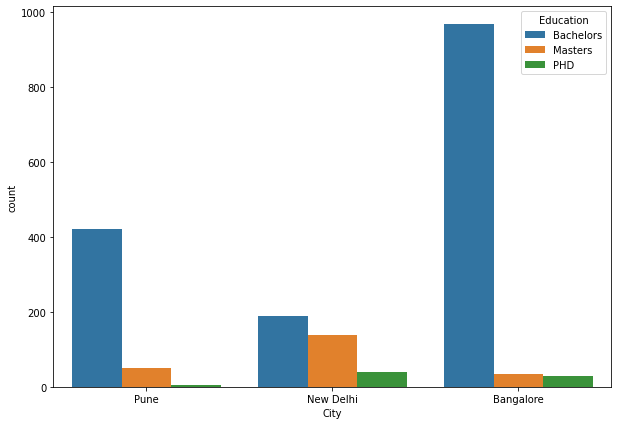

In [28]:
graph.figure(figsize=(10,7))
chart.countplot(data=df[df['Experience']=='high level'],x="City",hue="Education")


<Axes: xlabel='City', ylabel='count'>

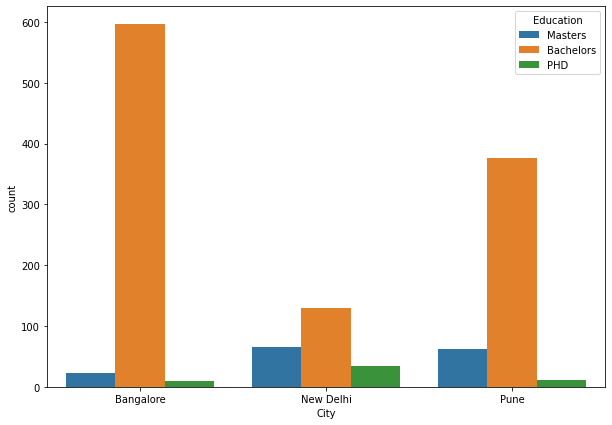

In [29]:
graph.figure(figsize=(10,7))
chart.countplot(data=df[df['Experience']=='mid level'],x="City",hue="Education")


<Axes: xlabel='City', ylabel='count'>

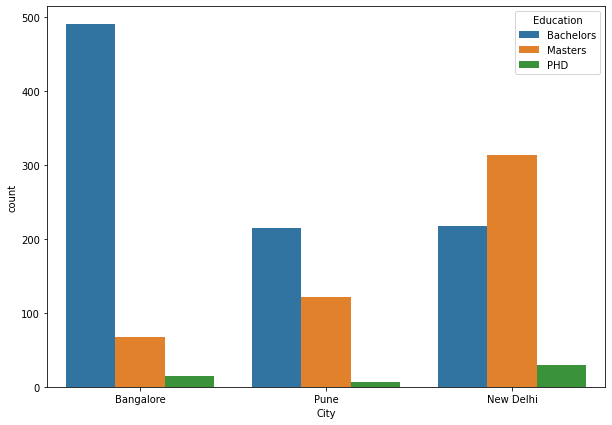

In [31]:
graph.figure(figsize=(10,7))
chart.countplot(data=df[df['Experience']=='Newbie'],x="City",hue="Education")


**Question:**

Which Gender of people from city will leave?

<Axes: xlabel='City', ylabel='count'>

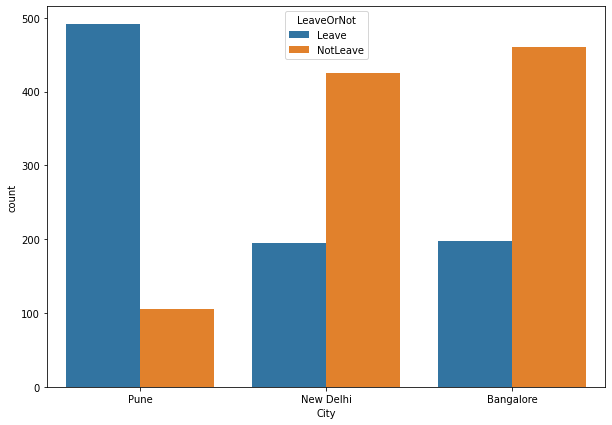

In [215]:
graph.figure(figsize=(10,7))
chart.countplot(data=df[df['Gender']=='Female'],x="City",hue="LeaveOrNot")

<Axes: xlabel='City', ylabel='count'>

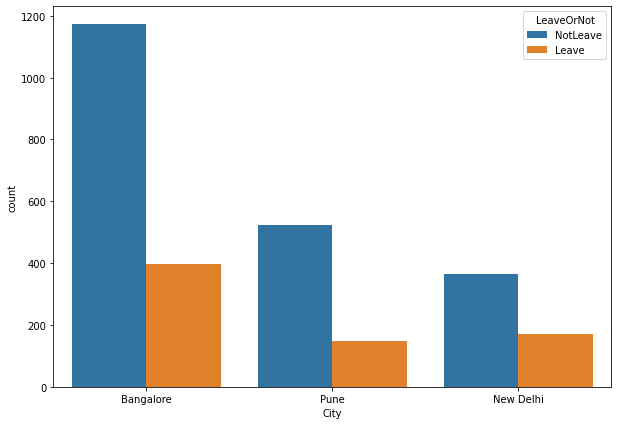

In [216]:
graph.figure(figsize=(10,7))
chart.countplot(data=df[df['Gender']=='Male'],x="City",hue="LeaveOrNot")

**Summary:**

It is clearly observed that female employees from Pune are goiung to leave and Male emoployees from banglore are going to leave. Hiring team should work with the female employees to solve some problem to avoid this and the same should be done by banglore team with males. 



**Conclusion:**

Through the above data we learned that, almost 1/3rd of the companys employees are going to leave. Out of which maximum females are from pune office and males from banglore office. People from payment tier 2 are not happy or maybe by any other reason will leave the company. Most of people from banglore have bachelors degree and most with Phd are located in New Delhis office. 

In [36]:
!jupyter nbconvert --to html Employees_prediction.ipynb


[NbConvertApp] Converting notebook Employees_prediction.ipynb to html
[NbConvertApp] Writing 2159468 bytes to Employees_prediction.html
